## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [1]:
import sys,json
import glob, os
from nilearn import plotting, datasets     

sys.path.append("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/")

from stats_group_level import Stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [2]:
# Load config file ------------------------------------------------------------
with open('../../config/config_seed2voxels_2ndlevel.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified
    
ana2run=["C1C7_DR_gmwm"] # copy and pass the analyse name (same as config["seeds"])

#The model should be defined in the config file line 5 : "OneSampleT" "TwoSampT_paired" "TwoSampT_unpaired" 'HigherOrder_paired'

### <font color=#4424D6> II. Initialize class based on this </font>

In [3]:
stats={}
for ana_name in ana2run:
    stats[ana_name]=Stats(config,ana_name,save_ana=True) # initialize the function


************************************** 
Initiate C1C7_DR_gmwm analysis
  
> Statistical model: OneSampleT
> Number of participants: 31
> Mask : MNI_GM_3mm.nii.gz
> Saved here : /cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//seed_to_voxels/summer_2023//2_second_level/OneSampleT/MNI_GM_3mm/MI/C1C7_DR_gmwm
  


## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Create design matrix

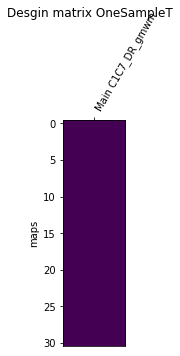

In [191]:
Design_matrix={}
for ana_name in ana2run:
    Design_matrix[ana_name]=stats[ana_name].design_matrix(plot_matrix= True,save_matrix=True) #contrast_name="4quad_9levels",


## <font color=#B2D732> <span style="background-color: #4424D6"> C/ Create second level model and apply correction

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/mass_univariate/permuted_least_squares.py:960: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  image.new_img_like(masker.mask_img_, metric_map),
/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)
/cerebro/cerebro1/dat

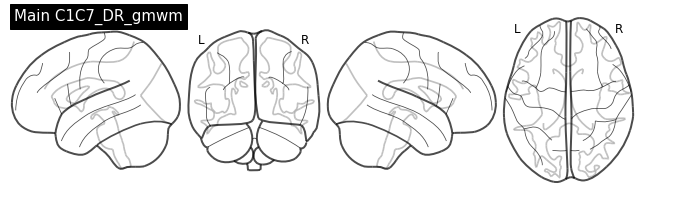

In [193]:
maps_uncorr={}
for ana_name in ana2run:
    maps_uncorr[ana_name]=stats[ana_name].secondlevelmodel(Design_matrix[ana_name],plot_2ndlevel=True,save_img=True,parametric=False) #stats_1T.secondlevelmodel(Design_matrix_1T)
    #stats[ana_name].secondlevel_correction(maps_uncorr[ana_name],p_value=0.01,corr="fdr",plot_stats_corr=True,save_img=True) #stats_1T.secondlevelmodel(Design_matrix_1T)


In [145]:
maps_uncorr[ana_name]

{'Main C1C7_DR_gmwm': {'t': <nibabel.nifti1.Nifti1Image at 0x7f1846035128>,
  'logp_max_t': <nibabel.nifti1.Nifti1Image at 0x7f18581cc470>,
  'size': <nibabel.nifti1.Nifti1Image at 0x7f1844037198>,
  'logp_max_size': <nibabel.nifti1.Nifti1Image at 0x7f1846035978>,
  'mass': <nibabel.nifti1.Nifti1Image at 0x7f1844037f60>,
  'logp_max_mass': <nibabel.nifti1.Nifti1Image at 0x7f1844037828>}}

In [ ]:
maps_uncorr[ana_name]

## <font color=#B2D732> <span style="background-color: #4424D6"> D/ plot surface view

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


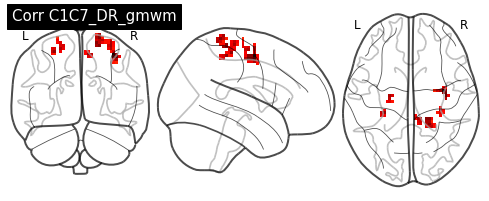

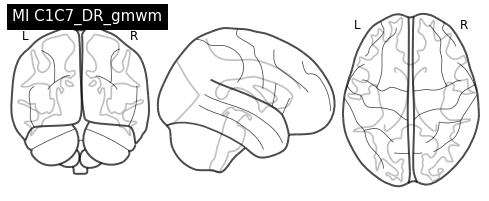

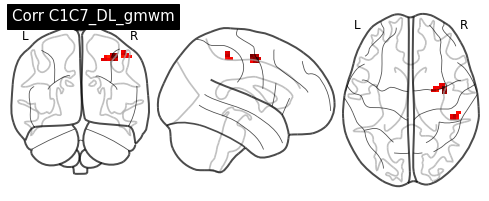

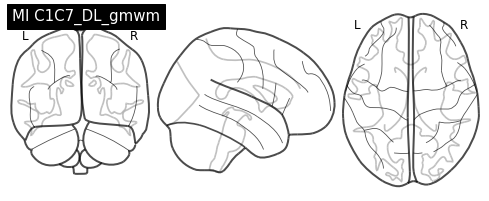

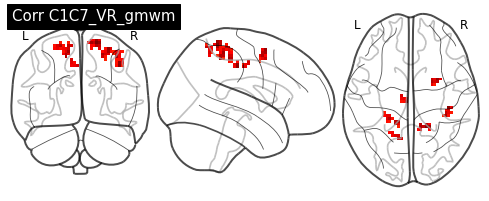

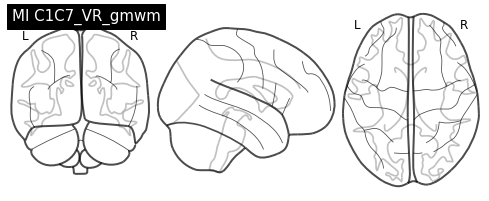

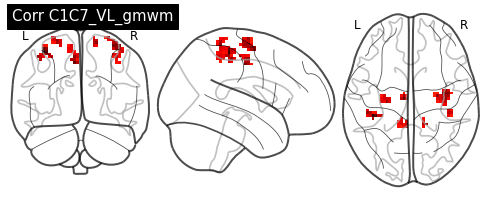

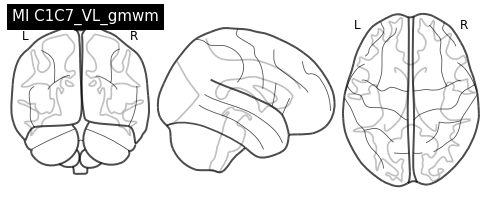

In [72]:
from nilearn import plotting
main_dir=config["second_level"]+"/OneSampleT/MNI_GM_3mm_SMC/"
seeds=["C1C7_DR_gmwm","C1C7_DL_gmwm","C1C7_VR_gmwm","C1C7_VL_gmwm"]
measures=["Corr","MI"]
for seed in seeds:

    for measure in measures:

        image=glob.glob(main_dir + "/" + measure + "/" + seed + "/fpr_corrected/Main "+seed+"_fpr_p01.nii.gz")[0]



        #plotting.plot_stat_map(image,threshold=0, vmax=4, display_mode='ortho',draw_cross=False,cut_coords=[-1,-17.5,59],title=measure + " " + seed)

        plotting.plot_glass_brain(image,threshold=0, vmax=4, title=measure + " " + seed)


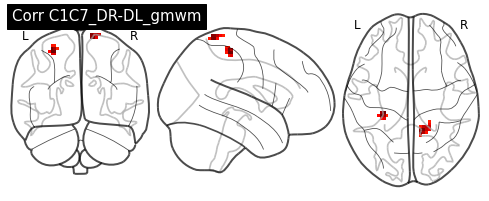

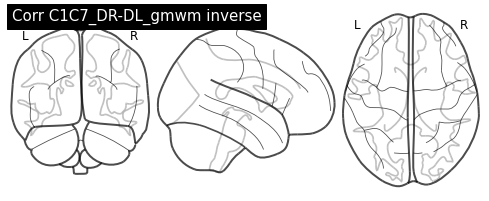

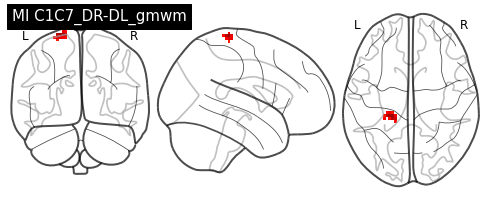

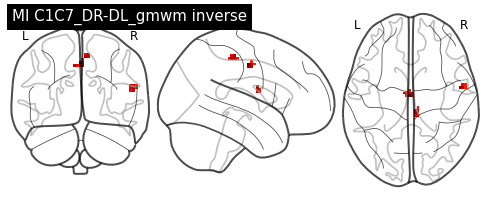

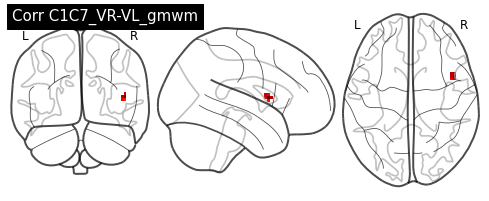

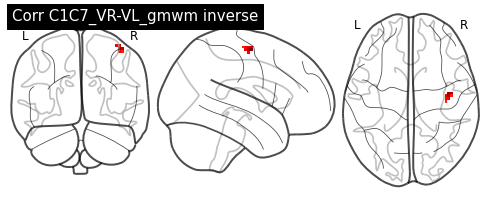

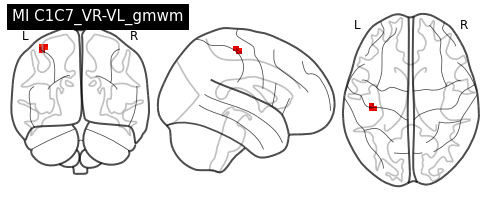

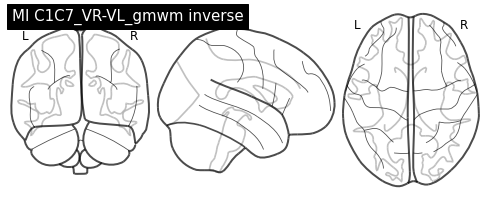

In [73]:
from nilearn import plotting
main_dir=config["second_level"]+"/TwoSampT_paired/MNI_GM_3mm_SMC/"
seeds=["C1C7_DR-DL_gmwm","C1C7_VR-VL_gmwm"]
measures=["Corr","MI"]
for seed in seeds:
    for measure in measures:
        image1=glob.glob(main_dir + "/" + measure + "/" + seed + "/fpr_corrected/"+ seed.split("-")[0] + "*fpr_p01.nii.gz")[0]
        image2=glob.glob(main_dir + "/" + measure + "/" + seed + "/fpr_corrected/C1C7_"+ seed.split("-")[-1] + "*fpr_p01.nii.gz")[0]

        plotting.plot_glass_brain(image1,threshold=0, vmax=4, title=measure + " " + seed)
        plotting.plot_glass_brain(image2,threshold=0, vmax=4, title=measure + " " + seed + " inverse")


In [69]:
image1

'/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/2_second_level//TwoSampT_paired/MNI_GM_3mm//Corr/C1C7_DR-DL_gmwm/fpr_corrected/C1C7_DR*fpr_p01.nii.gz'

In [65]:
main_dir + "/" + measure + "/" + seed + "/fpr_corrected/C1C7_"+ seed.split("-")[-1] + "*fpr_p01.nii.gz"

'/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/2_second_level//TwoSampT_paired/MNI_GM_3mm//MI/C1C7_VR-VL_gmwm/fpr_corrected/C1C7_VL_gmwm*fpr_p01.nii.gz'